In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score


In [18]:
data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Checking for NULL values

In [20]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Loading 'Age', 'Estimated_salary' as the features in 'x' and
 'Purchased' as the target variable in 'y'

In [21]:
x = data.iloc[:,2:4]

In [22]:
y = data.iloc[:,4]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [24]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [25]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

print(x_test[:10])
print()
print(pred[:10])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]
 [-0.75873781 -0.23076704]
 [ 0.9106163   1.08372877]
 [-0.85693511  0.38266434]
 [ 0.2232352   0.14897619]
 [ 0.4196298  -0.14313399]]

[0 1 0 1 0 0 1 0 0 0]


In [26]:
print('Expected Output:',pred[:10])
print()
print('Predicted Output:\n',y_test[:10])

Expected Output: [0 1 0 1 0 0 1 0 0 0]

Predicted Output:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


* Evaluating the model based on confusion matrix

In [27]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
print("Value of TP: ", tp)
print("Value of FP: ", fp)
print("Value of TN: ", tn)
print("Value of FN: ", fn)

[[61  2]
 [12 25]]
Value of TP:  25
Value of FP:  2
Value of TN:  61
Value of FN:  12


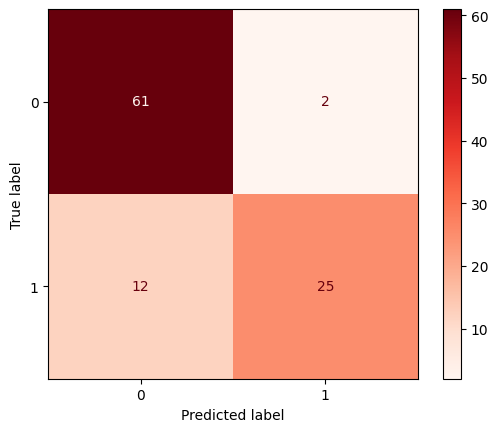

In [33]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Reds)
plt.show()

* Determining the Accuracy,Error Rate,Recall,Precision of the model

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [30]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Recall: ',tp/(tp+fn))
print('Precision: ',tp/(tp+fp))



Accuracy: 0.86
Error Rate:  0.14
Recall:  0.6756756756756757
Precision:  0.9259259259259259
